In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import warnings

warnings.filterwarnings("ignore") # warningleri görmezden gelir

# Verileri İçeri Aktaralım

In [2]:
veri = pd.read_csv("olimpiyatlar.csv")
veri.head()

,ID,Name,Gender,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


# Veri Hakkında Bilgi

In [3]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Gender  271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


# Sutun İsimlerini Değiştirelim

In [4]:
veri.rename(columns = {"ID"     :"id",
                       "Name"   :"isim", 
                       "Gender" :"cinsiyet",
                       "Age"    :"yaş",
                       "Height" :"boy",
                       "Weight" :"ağırlık",
                       "Team"   :"takım",
                       "NOC"    :"uok",
                       "Games"  :"oyunlar",
                       "Year"   :"yıl",
                       "Season" :"sezon",
                       "City"   :"şehir",
                       "Sport"  :"spor",
                       "Event"  :"etkinlik",
                       "Medal"  :"madalya"}, inplace=True) # inplace true yaparak direkt veri seti üzerinden değişiklik yapıyoruz
veri.head(3)

,id,isim,cinsiyet,yaş,boy,ağırlık,takım,uok,oyunlar,yıl,sezon,şehir,spor,etkinlik,madalya
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN


# Yararsız Verilerin Çıkarılması

In [5]:
veri.drop(["id","oyunlar"], axis=1, inplace=True)
veri.head(3)

,isim,cinsiyet,yaş,boy,ağırlık,takım,uok,yıl,sezon,şehir,spor,etkinlik,madalya
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,NaN


# Boy ve Kilo Sutunu Kayıp Veri Doldurma

In [6]:
essiz_etkinlik = pd.unique(veri.etkinlik) # unique ile birden fazla etkinlik olanları görmeden tüm etkinlikleri alırız
print("Eşsiz etkinlik sayısı: {}" .format(len(essiz_etkinlik)))
print(essiz_etkinlik[:10])

Eşsiz etkinlik sayısı: 765
["Basketball Men's Basketball" "Judo Men's Extra-Lightweight"
 "Football Men's Football" "Tug-Of-War Men's Tug-Of-War"
 "Speed Skating Women's 500 metres" "Speed Skating Women's 1,000 metres"
 "Cross Country Skiing Men's 10 kilometres"
 "Cross Country Skiing Men's 50 kilometres"
 "Cross Country Skiing Men's 10/15 kilometres Pursuit"
 "Cross Country Skiing Men's 4 x 10 kilometres Relay"]


In [7]:
veri_gecici = veri.copy() # Gerçek veriyi kaybetmemek için geçici bir değişkene kopyalıyoruz
boy_kilo_liste = ["boy", "ağırlık"]

for e in essiz_etkinlik:
    
    etkinlik_filtre = veri_gecici.etkinlik == e
    veri_filtreli = veri_gecici[etkinlik_filtre]
    
    for s in boy_kilo_liste:
        ortalama = np.round(np.mean(veri_filtreli[s]),2)
         
        if ~np.isnan(ortalama): # eger etkinlik ozelinde ortalama varsa
            veri_filtreli[s] = veri_filtreli[s].fillna(ortalama)
        else: # eger etkinlik ozelinde ortalama yoksa tum veri ortalamasini hesapla 
            tum_veri_ortalamasi = np.round(np.mean(veri[s]), 2)
            veri_filtreli[s] = veri_filtreli[s].fillna(tum_veri_ortalamasi)
            
    veri_gecici[etkinlik_filtre] = veri_filtreli        

veri = veri_gecici.copy()
veri.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 13 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   isim      271116 non-null  object 
 1   cinsiyet  271116 non-null  object 
 2   yaş       261642 non-null  float64
 3   boy       271116 non-null  float64
 4   ağırlık   271116 non-null  float64
 5   takım     271116 non-null  object 
 6   uok       271116 non-null  object 
 7   yıl       271116 non-null  int64  
 8   sezon     271116 non-null  object 
 9   şehir     271116 non-null  object 
 10  spor      271116 non-null  object 
 11  etkinlik  271116 non-null  object 
 12  madalya   39783 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 26.9+ MB


# Yas sutunu kayıp veri doldurma

In [8]:
yas_ortalamasi = np.round(np.mean(veri.yaş), 0)
print("Yaş Ortalaması: {}" .format(yas_ortalamasi))
veri["yaş"] = veri["yaş"].fillna(yas_ortalamasi)
veri.info()

Yaş Ortalaması: 26.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 13 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   isim      271116 non-null  object 
 1   cinsiyet  271116 non-null  object 
 2   yaş       271116 non-null  float64
 3   boy       271116 non-null  float64
 4   ağırlık   271116 non-null  float64
 5   takım     271116 non-null  object 
 6   uok       271116 non-null  object 
 7   yıl       271116 non-null  int64  
 8   sezon     271116 non-null  object 
 9   şehir     271116 non-null  object 
 10  spor      271116 non-null  object 
 11  etkinlik  271116 non-null  object 
 12  madalya   39783 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 26.9+ MB


# Madalya Alamayan Sporcuları Veri Setinden Çıkar

In [9]:
madalya_degiskeni = veri["madalya"]
print(pd.isnull(madalya_degiskeni).sum())

madalya_degiskeni_filtresi = ~pd.isnull(madalya_degiskeni)
veri = veri[madalya_degiskeni_filtresi]
veri.head(10)
veri.info()

veri.to_csv("olimpiyatlar_temizlenmiş.csv", index=False) # Temizlenmiş veriyi kaydediyoruz

231333
<class 'pandas.core.frame.DataFrame'>
Int64Index: 39783 entries, 3 to 271103
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   isim      39783 non-null  object 
 1   cinsiyet  39783 non-null  object 
 2   yaş       39783 non-null  float64
 3   boy       39783 non-null  float64
 4   ağırlık   39783 non-null  float64
 5   takım     39783 non-null  object 
 6   uok       39783 non-null  object 
 7   yıl       39783 non-null  int64  
 8   sezon     39783 non-null  object 
 9   şehir     39783 non-null  object 
 10  spor      39783 non-null  object 
 11  etkinlik  39783 non-null  object 
 12  madalya   39783 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 4.2+ MB


# TEK DEĞİŞKENLİ VERİ ANALİZİ
  # Sayısal Değişkenler(Yaş,Boy,Kilo,Yıl)

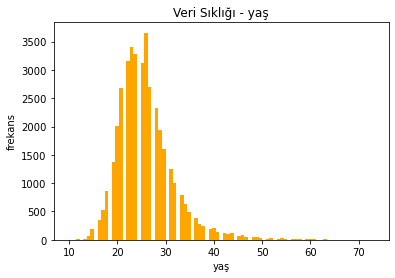

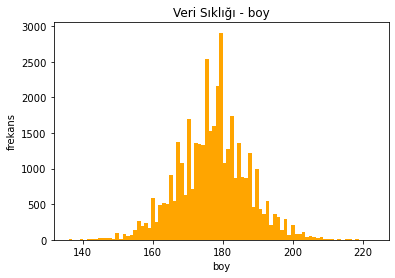

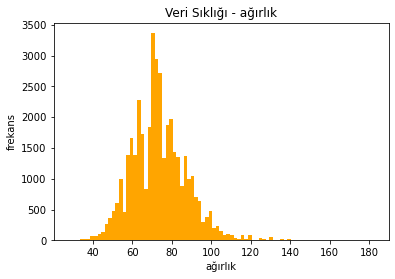

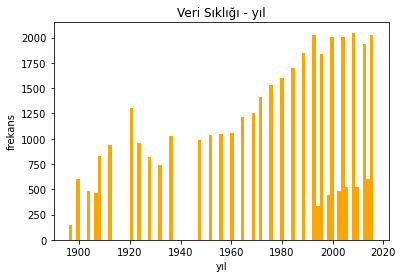

,yaş,boy,ağırlık,yıl
count,39783.000000,39783.000000,39783.000000,39783.000000
mean,25.926552,177.336690,73.738320,1973.943845
std,5.859372,10.170124,13.979041,33.822857
min,10.000000,136.000000,28.000000,1896.000000
25%,22.000000,170.000000,64.000000,1952.000000
50%,25.000000,177.480000,73.000000,1984.000000
75%,29.000000,184.000000,82.000000,2002.000000
max,73.000000,223.000000,182.000000,2016.000000


In [10]:
def plotHistogram(degisken):
    
    plt.figure()
    plt.hist(veri[degisken], bins=85, color="orange") # bins bölünecek aralık sayısı
    plt.xlabel(degisken)
    plt.ylabel("frekans")
    plt.title("Veri Sıklığı - {}" .format(degisken))
    plt.show()
    
sayisalDegiskenler = ["yaş", "boy", "ağırlık", "yıl"]   

for i in sayisalDegiskenler:
    plotHistogram(i)
    
verininIstatistikselOzellikleri = veri.describe()
verininIstatistikselOzellikleri

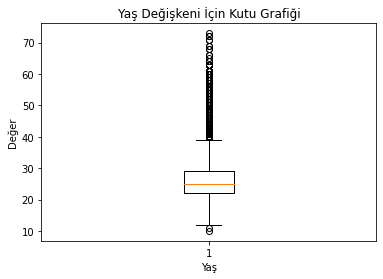

In [11]:
plt.boxplot(veri["yaş"])
plt.title("Yaş Değişkeni İçin Kutu Grafiği")
plt.xlabel("Yaş")
plt.ylabel("Değer")
plt.show()

# Kategorik Değişkenler

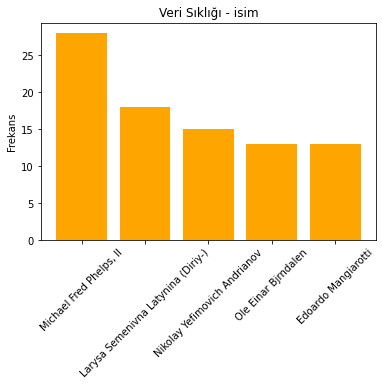

isim: 
 Michael Fred Phelps, II               28
Larysa Semenivna Latynina (Diriy-)    18
Nikolay Yefimovich Andrianov          15
Ole Einar Bjrndalen                   13
Edoardo Mangiarotti                   13
Name: isim, dtype: int64


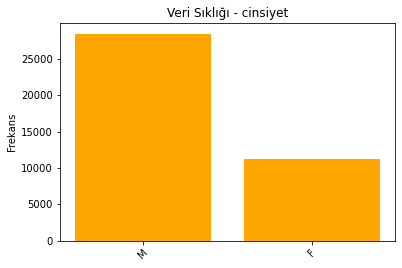

cinsiyet: 
 M    28530
F    11253
Name: cinsiyet, dtype: int64


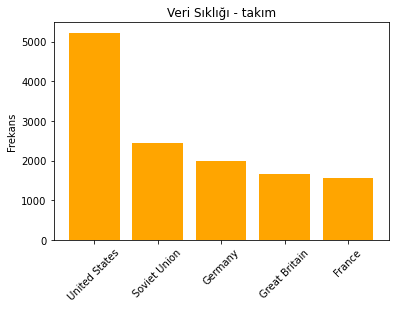

takım: 
 United States    5219
Soviet Union     2451
Germany          1984
Great Britain    1673
France           1550
Name: takım, dtype: int64


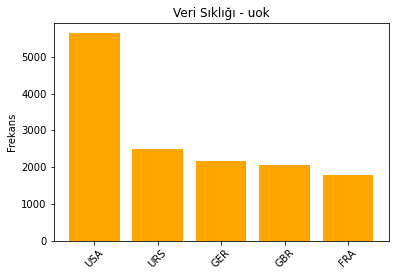

uok: 
 USA    5637
URS    2503
GER    2165
GBR    2068
FRA    1777
Name: uok, dtype: int64


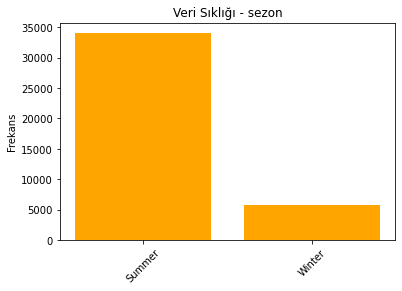

sezon: 
 Summer    34088
Winter     5695
Name: sezon, dtype: int64


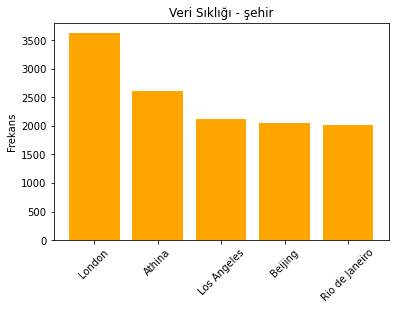

şehir: 
 London            3624
Athina            2602
Los Angeles       2123
Beijing           2048
Rio de Janeiro    2023
Name: şehir, dtype: int64


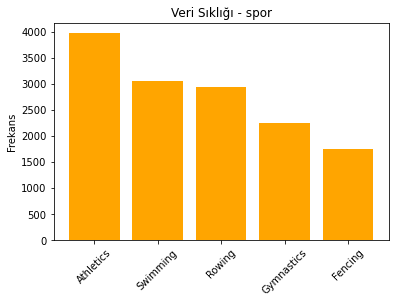

spor: 
 Athletics     3969
Swimming      3048
Rowing        2945
Gymnastics    2256
Fencing       1743
Name: spor, dtype: int64


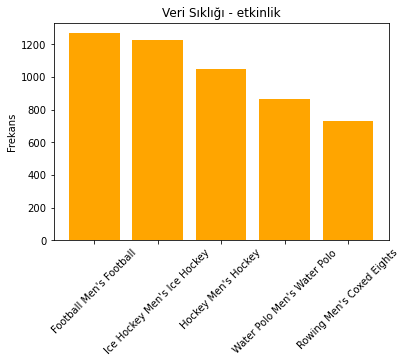

etkinlik: 
 Football Men's Football        1269
Ice Hockey Men's Ice Hockey    1230
Hockey Men's Hockey            1050
Water Polo Men's Water Polo     866
Rowing Men's Coxed Eights       730
Name: etkinlik, dtype: int64


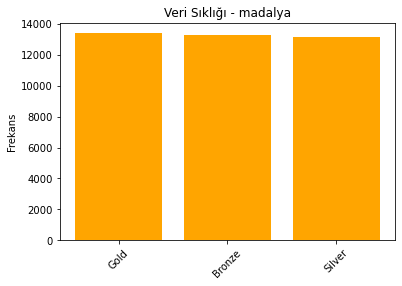

madalya: 
 Gold      13372
Bronze    13295
Silver    13116
Name: madalya, dtype: int64


In [12]:
def plotBar(degisken, n=5):
    
    veri_ = veri[degisken]
    veri_sayma = veri_.value_counts()
    veri_sayma = veri_sayma[:n]
    
    plt.figure()
    plt.bar(veri_sayma.index, veri_sayma, color="orange")
    plt.xticks(veri_sayma.index, veri_sayma.index.values)
    plt.xticks(rotation=45)
    plt.ylabel("Frekans")
    plt.title("Veri Sıklığı - {}" .format(degisken))
    plt.show()
    print("{}: \n {}".format(degisken,veri_sayma))
    
kategorikDegisken = ["isim","cinsiyet","takım","uok","sezon","şehir","spor","etkinlik","madalya"]

for i in kategorikDegisken:
    plotBar(i)

# İKİ DEĞİŞKENLİ VERİ ANALİZİ

# Cinsiyete Gore Boy ve Agirlik Karsilastirmasi

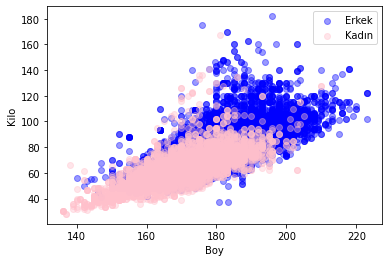

In [13]:
erkek = veri[veri.cinsiyet == "M"]
kadin = veri[veri.cinsiyet == "F"]

plt.figure()
plt.scatter(erkek.boy, erkek.ağırlık, alpha = 0.4, label = "Erkek", color= "blue")
plt.scatter(kadin.boy, kadin.ağırlık, alpha = 0.4, label = "Kadın", color = "pink")
plt.xlabel("Boy")
plt.ylabel("Kilo")
plt.legend()
plt.show()

# Sayısal Sutunlar Arasındaki İlişki İncelemesi

In [14]:
korelasyon_tablosu = veri.loc[:,["yaş","boy","ağırlık"]].corr()
korelasyon_tablosu

,yaş,boy,ağırlık
yaş,1.000000,0.061727,0.136404
boy,0.061727,1.000000,0.794368
ağırlık,0.136404,0.794368,1.000000


# Madalya - Yaş İlişkisi

In [15]:
veri_gecici = veri.copy()
veri_gecici = pd.get_dummies(veri_gecici, columns=["madalya"])

madalya_yas_korelasyon = veri_gecici.loc[:,["yaş","madalya_Bronze","madalya_Silver","madalya_Gold"]].corr()
madalya_yas_korelasyon

,yaş,madalya_Bronze,madalya_Silver,madalya_Gold
yaş,1.000000,-0.005407,0.008408,-0.002968
madalya_Bronze,-0.005407,1.000000,-0.496859,-0.504110
madalya_Silver,0.008408,-0.496859,1.000000,-0.499022
madalya_Gold,-0.002968,-0.504110,-0.499022,1.000000


# Yarışmacıların Kazandıkları Altın-Gümüş-Bronz Madalya Sayıları

In [16]:
veri_gecici.loc[:,["takım","madalya_Bronze","madalya_Silver","madalya_Gold"]].groupby(["takım"], as_index = False).sum().sort_values(by="madalya_Gold", ascending = False)[:10]

,takım,madalya_Bronze,madalya_Silver,madalya_Gold
462,United States,1233.0,1512.0,2474.0
403,Soviet Union,677.0,716.0,1058.0
165,Germany,678.0,627.0,679.0
215,Italy,484.0,508.0,535.0
171,Great Britain,572.0,582.0,519.0
149,France,577.0,518.0,455.0
420,Sweden,507.0,476.0,451.0
198,Hungary,365.0,330.0,432.0
67,Canada,408.0,413.0,422.0
117,East Germany,263.0,309.0,369.0


# Kazanilan Madalyalarin Hangi Sehirlerde Kazanildiklari

In [17]:
veri_gecici.loc[:,["şehir","madalya_Bronze","madalya_Silver","madalya_Gold"]].groupby(["şehir"], as_index = False).sum().sort_values(by="madalya_Gold", ascending = False)[:10]

,şehir,madalya_Bronze,madalya_Silver,madalya_Gold
17,London,1214.0,1195.0,1215.0
3,Athina,860.0,859.0,883.0
18,Los Angeles,706.0,691.0,726.0
6,Beijing,710.0,667.0,671.0
27,Rio de Janeiro,703.0,655.0,665.0
38,Sydney,680.0,661.0,663.0
4,Atlanta,629.0,605.0,608.0
5,Barcelona,604.0,549.0,559.0
33,Seoul,549.0,513.0,520.0
2,Antwerpen,367.0,448.0,493.0


# Cinsiyete Gore Kazanilan Altin-Gumus-Bronz Madalya Sayilari

In [18]:
veri_gecici.loc[:,["cinsiyet","madalya_Bronze","madalya_Silver","madalya_Gold"]].groupby(["cinsiyet"], as_index = False).sum().sort_values(by="madalya_Gold", ascending = False)[:10]

,cinsiyet,madalya_Bronze,madalya_Silver,madalya_Gold
1,M,9524.0,9381.0,9625.0
0,F,3771.0,3735.0,3747.0


# ÇOK DEĞİŞKENLİ VERİ ANALİZİ

# Pivot Tablosu

In [19]:
veri_pivot = veri.pivot_table(index="madalya", columns="cinsiyet", values=["yaş", "boy", "ağırlık"],
                              aggfunc={"boy":np.mean, "ağırlık":np.mean, "yaş":[min, max, np.std]})
veri_pivot.head()

ağırlık                    boy               yaş              \
               mean                   mean               max         min   
cinsiyet          F          M           F           M     F     M     F   
madalya                                                                    
Bronze    62.757125  77.841504  170.003227  180.045806  69.0  72.0  12.0   
Gold      63.199349  78.186505  170.448727  180.318906  63.0  64.0  13.0   
Silver    62.866892  77.960887  170.233783  180.053626  55.0  73.0  11.0   

                                    
                     std            
cinsiyet     M         F         M  
madalya                             
Bronze    10.0  5.329416  5.869104  
Gold      13.0  5.219710  5.987016  
Silver    13.0  5.253290  6.096383

# Anomali Tespiti(Aykırı Değer)

In [20]:
def anomaliTespiti(df, ozellik):
    outlier_indices = []
    
    for c in ozellik:
        # 1. çeyrek
        Q1 = np.percentile(df[c], 25)
        # 3. çeyrek
        Q3 = np.percentile(df[c], 75)
        # IQR
        IQR = Q3 - Q1
        # aykırı değer için ek adım miktarı
        outlier_step = 1.5 * IQR
        # aykırı değeri ve de bulunduğu indeksi tespit edelim
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # tespit edilen indeksleri depolayalım
        outlier_indices.extend(outlier_list_col)
        
    # essiz aykiri degerleri bulalim
    outlier_indices = Counter(outlier_indices)
    # eger bir ornek v adet sutunda farkli deger ise bunu aykiri kabul edelim
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 1) # 1'den buyuk degerler icin aykiri deger yok    
    
    return multiple_outliers

veri_anomali = veri.loc[anomaliTespiti(veri, ["yaş", "ağırlık", "boy"])]
veri_anomali.spor.value_counts()

Basketball        64
Gymnastics        34
Handball           6
Athletics          5
Sailing            3
Diving             3
Shooting           1
Figure Skating     1
Wrestling          1
Name: spor, dtype: int64

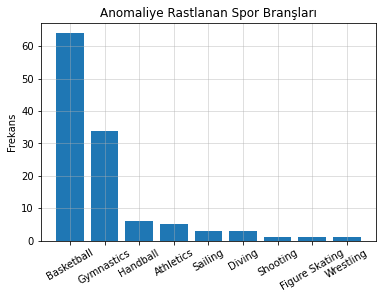

In [21]:
plt.figure()
plt.bar(veri_anomali.spor.value_counts().index, veri_anomali.spor.value_counts().values)
plt.xticks(rotation=30)
plt.title("Anomaliye Rastlanan Spor Branşları")
plt.ylabel("Frekans")
plt.grid(True, alpha=0.5)
plt.show()

In [22]:
veri_gym = veri_anomali[veri_anomali.spor == "Gymnastics"]
veri_gym
veri_gym.etkinlik.value_counts()

Gymnastics Women's Team All-Around          21
Gymnastics Women's Uneven Bars               6
Gymnastics Women's Balance Beam              3
Gymnastics Women's Floor Exercise            2
Gymnastics Women's Individual All-Around     1
Gymnastics Women's Horse Vault               1
Name: etkinlik, dtype: int64

# Zaman Serilerinde Veri Analizi

In [23]:
veri_zaman = veri.copy()
veri_zaman.head()

,isim,cinsiyet,yaş,boy,ağırlık,takım,uok,yıl,sezon,şehir,spor,etkinlik,madalya
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
40,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


In [24]:
essiz_yillar = veri_zaman.yıl.unique()
essiz_yillar

array([1900, 1920, 2014, 1948, 1952, 1992, 1994, 2002, 2006, 2008, 1988,
       1996, 1960, 1912, 1956, 2016, 2012, 2000, 2004, 1980, 1984, 1936,
       1906, 1964, 1972, 1924, 1904, 1932, 1928, 1968, 1976, 2010, 1908,
       1998, 1896], dtype=int64)

In [25]:
# etkinliğin yapıldığı yılları sıralayalım
sirali_array = np.sort(essiz_yillar)
sirali_array

array([1896, 1900, 1904, 1906, 1908, 1912, 1920, 1924, 1928, 1932, 1936,
       1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988,
       1992, 1994, 1996, 1998, 2000, 2002, 2004, 2006, 2008, 2010, 2012,
       2014, 2016], dtype=int64)

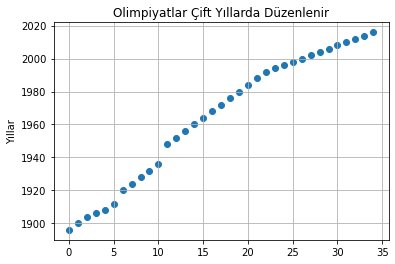

In [26]:
# saçılım grafiğini çizdirelim
plt.figure()
plt.scatter(range(len(sirali_array)), sirali_array)
plt.grid(True)
plt.ylabel("Yıllar")
plt.title("Olimpiyatlar Çift Yıllarda Düzenlenir")
plt.show()

In [27]:
# veri içerisinde yer alan yıl değerlerini datetime tipine dönüştürelim
tarih_saat_nesnesi = pd.to_datetime(veri_zaman["yıl"], format="%Y")
type(tarih_saat_nesnesi)
tarih_saat_nesnesi.head()

veri_zaman["tarih_saat"] = tarih_saat_nesnesi
veri_zaman.head()

,isim,cinsiyet,yaş,boy,ağırlık,takım,uok,yıl,sezon,şehir,spor,etkinlik,madalya,tarih_saat
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,1900-01-01
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,1920-01-01
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,1920-01-01
40,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze,2014-01-01
41,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze,1948-01-01


In [28]:
# veri_zaman degiskeninin ana indeksini, datetime tipi olan tarih_saat degeriyle degistirelim
veri_zaman = veri_zaman.set_index("tarih_saat")
veri_zaman.drop(["yıl"], axis=1, inplace=True)
veri_zaman.head()

,isim,cinsiyet,yaş,boy,ağırlık,takım,uok,sezon,şehir,spor,etkinlik,madalya
tarih_saat,,,,,,,,,,,,
1900-01-01,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
1920-01-01,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
1920-01-01,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
2014-01-01,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
1948-01-01,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


# Yıllara Göre Ortalama Yaş-Boy-Kilo Değişimi

In [30]:
periyodik_veri = veri_zaman.resample("2A").mean() # 2 yıllık periyotlarla ortalamalara bakalım
periyodik_veri.head(20)

,yaş,boy,ağırlık
tarih_saat,,,
1896-12-31,24.034965,174.280350,72.734056
1898-12-31,NaN,NaN,NaN
1900-12-31,27.885762,177.882301,74.979950
1902-12-31,NaN,NaN,NaN
1904-12-31,26.421811,177.241091,74.330823
1906-12-31,26.624454,176.347576,74.072183
1908-12-31,27.601685,176.662419,73.721107
1910-12-31,NaN,NaN,NaN
1912-12-31,27.495218,176.890244,74.321467


In [40]:
# kayıp verileri çıkaralım
periyodik_veri.dropna(axis=0, inplace=True)
periyodik_veri.head(20)

,yaş,boy,ağırlık
tarih_saat,,,
1896-12-31,24.034965,174.280350,72.734056
1900-12-31,27.885762,177.882301,74.979950
1904-12-31,26.421811,177.241091,74.330823
1906-12-31,26.624454,176.347576,74.072183
1908-12-31,27.601685,176.662419,73.721107
1912-12-31,27.495218,176.890244,74.321467
1920-12-31,29.305046,176.333012,73.246437
1924-12-31,28.021830,176.658212,74.427058
1928-12-31,26.291616,175.687934,72.530049


<Figure size 432x288 with 0 Axes>

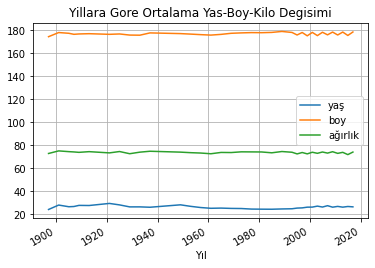

In [39]:
# grafiği çizdirelim
plt.figure()
periyodik_veri.plot()
plt.title("Yillara Gore Ortalama Yas-Boy-Kilo Degisimi")
plt.xlabel("Yıl")
plt.grid(True)
plt.show()